In [22]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(r"./tmp/data/", one_hot=False)   # 資料載入器

import tensorflow as tf


learning_rate = 0.001 # 訓練速度
num_steps = 30        # 跑幾個epoch
batch_size = 128      # 每批的資料數目

num_input = 784       # input 大小 784= 28x 28
num_classes = 10      # output 大小 10 (類)
dropout = 0.25        # Dropout機率 (0.25表示有0.25機率不更新權重)


def conv_net(x_dict, n_classes, dropout, reuse, is_training):
    with tf.variable_scope('ConvNet', reuse=reuse):
        x = x_dict['images']

        x = tf.reshape(x, shape=[-1, 28, 28, 1])
        #                                    ^ feature軸
        
        # 把 shape=(batch_idx,784,1) => shape=(batch_idx,28,28,1)
        
        conv1 = tf.layers.conv2d(x, 32, 5, activation=tf.nn.relu)
    
        # x: 上一層輸出 , 32:kernel數目, 5: kernel size =5x5
        # activation=tf.nn.relu : 用ReLU當激活函數
        conv1 = tf.layers.max_pooling2d(conv1, 2, 2)
        # cnov1: 上一層輸出, 2,2: pool size = 2x2

        conv2 = tf.layers.conv2d(conv1, 64, 3, activation=tf.nn.relu)   
        # conv1: 上一層輸出 , 64:kernel數目, 5: kernel size =5x5
        # activation=tf.nn.relu : 用ReLU當激活函數
        conv2 = tf.layers.max_pooling2d(conv2, 2, 2)
        # cnov2: 上一層輸出, 2,2: pool size = 2x2

        fc1 = tf.contrib.layers.flatten(conv2)
        # 把CNN出來的輸出(shape = (7x7x64))攤平(shape = 3136)
        
        fc1 = tf.layers.dense(fc1, 1024)
        # 全連接神經網路 (shape = 3136) => (shape = 1024) 
        fc1 = tf.layers.dropout(fc1, rate=dropout, training=is_training)
        # Dropout 
        out = tf.layers.dense(fc1, n_classes)
        # 全連接神經網路 (shape = 1024) => (shape = 10) 

    return out


def model_fn(features, labels, mode):
    logits_train = conv_net(features, num_classes, dropout, reuse=False,
                            is_training=True)
    logits_test = conv_net(features, num_classes, dropout, reuse=True,
                           is_training=False)

    pred_classes = tf.argmax(logits_test, axis=1)
    pred_probas = tf.nn.softmax(logits_test)

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions=pred_classes)

    loss_op = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=logits_train, labels=tf.cast(labels, dtype=tf.int32)))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op = optimizer.minimize(loss_op,
                                  global_step=tf.train.get_global_step())

    acc_op = tf.metrics.accuracy(labels=labels, predictions=pred_classes)

    estim_specs = tf.estimator.EstimatorSpec(
        mode=mode,
        predictions=pred_classes,
        loss=loss_op,
        train_op=train_op,
        eval_metric_ops={'accuracy': acc_op})

    return estim_specs

model = tf.estimator.Estimator(model_fn)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, num_epochs=None, shuffle=True)

training_eval=[]
testing_eval=[]
for i in range(num_steps):
    model.train(input_fn, steps=1)
    input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.train.images}, y=mnist.train.labels,
    batch_size=batch_size, shuffle=False)
    e = model.evaluate(input_fn)
    training_eval.append(e)

    input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'images': mnist.test.images}, y=mnist.test.labels,
    batch_size=batch_size, shuffle=False)
    e = model.evaluate(input_fn)
    testing_eval.append(e)

print("Testing Accuracy:", e['accuracy'])

Extracting ./tmp/data/train-images-idx3-ubyte.gz
Extracting ./tmp/data/train-labels-idx1-ubyte.gz
Extracting ./tmp/data/t10k-images-idx3-ubyte.gz
Extracting ./tmp/data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.ckpt.
INFO:tensorflow:loss = 2.3034005, step = 1
INFO:tensorflow:Loss for final step: 2.3034005.
INFO:tensorflow:Starting evaluation at 2018-05-11-07:34:02
INFO:tensorflow:Restoring parameters from /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.

INFO:tensorflow:Starting evaluation at 2018-05-11-07:37:18
INFO:tensorflow:Restoring parameters from /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.ckpt-8
INFO:tensorflow:Finished evaluation at 2018-05-11-07:37:38
INFO:tensorflow:Saving dict for global step 8: accuracy = 0.7076909, global_step = 8, loss = 1.1848099
INFO:tensorflow:Starting evaluation at 2018-05-11-07:37:38
INFO:tensorflow:Restoring parameters from /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.ckpt-8
INFO:tensorflow:Finished evaluation at 2018-05-11-07:37:42
INFO:tensorflow:Saving dict for global step 8: accuracy = 0.7241, global_step = 8, loss = 1.1467649
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.ckpt-8
INFO:tensorflow:Saving checkpoints for 9 into /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.ckpt.
INFO:tensorflow:loss = 0.55793536, step = 9
INFO:t

INFO:tensorflow:loss = 0.02051558, step = 16
INFO:tensorflow:Loss for final step: 0.02051558.
INFO:tensorflow:Starting evaluation at 2018-05-11-07:40:59
INFO:tensorflow:Restoring parameters from /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.ckpt-16
INFO:tensorflow:Finished evaluation at 2018-05-11-07:41:19
INFO:tensorflow:Saving dict for global step 16: accuracy = 0.74765456, global_step = 16, loss = 0.89761466
INFO:tensorflow:Starting evaluation at 2018-05-11-07:41:19
INFO:tensorflow:Restoring parameters from /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.ckpt-16
INFO:tensorflow:Finished evaluation at 2018-05-11-07:41:23
INFO:tensorflow:Saving dict for global step 16: accuracy = 0.76, global_step = 16, loss = 0.8408711
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.ckpt-16
INFO:tensorflow:Saving checkpoints for 17 into /var/folders/v3/zsj5c

INFO:tensorflow:Restoring parameters from /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.ckpt-23
INFO:tensorflow:Saving checkpoints for 24 into /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.ckpt.
INFO:tensorflow:loss = 0.00048617527, step = 24
INFO:tensorflow:Loss for final step: 0.00048617527.
INFO:tensorflow:Starting evaluation at 2018-05-11-07:44:40
INFO:tensorflow:Restoring parameters from /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.ckpt-24
INFO:tensorflow:Finished evaluation at 2018-05-11-07:45:00
INFO:tensorflow:Saving dict for global step 24: accuracy = 0.7231454, global_step = 24, loss = 1.5825763
INFO:tensorflow:Starting evaluation at 2018-05-11-07:45:00
INFO:tensorflow:Restoring parameters from /var/folders/v3/zsj5cxd15tj_s87xtsz56h400000gn/T/tmp1s26zhq0/model.ckpt-24
INFO:tensorflow:Finished evaluation at 2018-05-11-07:45:04
INFO:tensorflow:Saving dict for global step 24: accuracy = 0.7373, global_step = 24, los

In [10]:
training_eval[0]['loss']

2.2598598

In [11]:
training_loss=[training_eval[i]['loss'] for i in range(30)]
testing_loss=[testing_eval[i]['loss'] for i in range(30)]
training_acc=[training_eval[i]['accuracy'] for i in range(30)]
testing_acc=[testing_eval[i]['accuracy'] for i in range(30)]

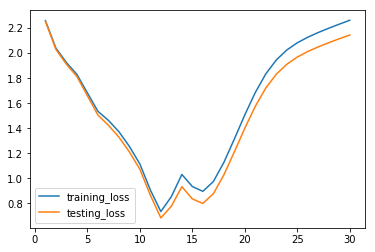

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1,31),training_loss,label='training_loss')
plt.plot(range(1,31),testing_loss,label='testing_loss')
plt.legend()